In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pycountry

from IPython.display import JSON
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('notebook', {'limit_output': 1000})  


{'limit_output': 1000}

In [2]:

# Connect to the SQLite database
connection = sqlite3.connect('sample.sqlite')

# Read 'account' table into a DataFrame
query_account = "SELECT * FROM account"
df_account = pd.read_sql_query(query_account, connection)

# Read 'iap_purchase' table into a DataFrame
query_iap_purchase = "SELECT * FROM iap_purchase"
df_iap_purchase = pd.read_sql_query(query_iap_purchase, connection)

# Read 'account_date_session' table into a DataFrame
query_account_date_session = "SELECT * FROM account_date_session"
df_account_date_session = pd.read_sql_query(query_account_date_session, connection)

# Close the connection
connection.close()

# Displaying the first few rows of each DataFrame for verification
print("Account DataFrame:")
print(df_account.head())

print("\nIAP Purchase DataFrame:")
print(df_iap_purchase.head())

print("\nAccount Date Session DataFrame:")
print(df_account_date_session.head())

Account DataFrame:
    account_id             created_time created_device created_platform  \
0     13514010  2016-03-02 17:11:00.332      iPhone6,2              iOS   
1   4308483975   2016-03-02 20:57:46.14      MIDC147PJ          Android   
2  17193137415  2016-03-02 13:52:16.735       SM-G360F          Android   
3  21488104920  2016-03-02 12:43:27.899        H60-L01          Android   
4  21488107995  2016-03-02 17:20:12.145       GT-I9500          Android   

  country_code  created_app_store_id  
0           GB                     1  
1           FR                     2  
2           IT                     2  
3           CN                     8  
4           RU                     2  

IAP Purchase DataFrame:
    account_id             created_time                   package_id_hash  \
0  30077202816  2016-03-26 23:59:59.355  ae0253c27c34edd1ab4fe21d6bfc91f8   
1  30077202816  2016-05-31 11:24:37.283  dd4c1bda4f2c904075fb2fbfcf30f30e   
2  21487283560  2016-02-13 03:40:28.644 

In [3]:
# Save 'df_account' DataFrame to a CSV file
df_account.to_csv('account_data.csv', index=False)

# Save 'df_iap_purchase' DataFrame to a CSV file
df_iap_purchase.to_csv('iap_purchase_data.csv', index=False)

# Save 'df_account_date_session' DataFrame to a CSV file
df_account_date_session.to_csv('account_date_session_data.csv', index=False)


In [4]:
df_account

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
0,13514010,2016-03-02 17:11:00.332,"iPhone6,2",iOS,GB,1
1,4308483975,2016-03-02 20:57:46.14,MIDC147PJ,Android,FR,2
2,17193137415,2016-03-02 13:52:16.735,SM-G360F,Android,IT,2
3,21488104920,2016-03-02 12:43:27.899,H60-L01,Android,CN,8
4,21488107995,2016-03-02 17:20:12.145,GT-I9500,Android,RU,2
...,...,...,...,...,...,...
112787,51554039942,2016-08-07 13:32:49.115,KOPO L128,Android,CN,4
112788,51554090637,2016-08-11 22:20:27.192,SM-G3608,Android,CN,15
112789,51554102314,2016-08-12 21:10:20.742,"iPhone8,4",iOS,US,1
112790,51554116380,2016-08-14 01:37:13.821,SM-G935F,Android,HR,2


In [5]:
df_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112792 entries, 0 to 112791
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   account_id            112792 non-null  object
 1   created_time          112792 non-null  object
 2   created_device        112792 non-null  object
 3   created_platform      112792 non-null  object
 4   country_code          112685 non-null  object
 5   created_app_store_id  112792 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


In [6]:
df_iap_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   account_id           9909 non-null   object
 1   created_time         9909 non-null   object
 2   package_id_hash      9909 non-null   object
 3   iap_price_usd_cents  9909 non-null   int64 
 4   app_store_id         9909 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 387.2+ KB


In [7]:
df_account_date_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698974 entries, 0 to 1698973
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   account_id            object
 1   date                  object
 2   session_count         int64 
 3   session_duration_sec  int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ MB


# About Datasets
The database contains three tables:account,account_date_session and iap_purchase_account.
The account table contains 6 columns and 112792 rows, account_date_session contains 5 columns and 9909 rows and iap_purchase_account contains 4 columns and 1698974 rows.
Account table contains user profiles, iap_purchase contains in - app purchases by the users, and account_date_session
contains the number of sessions for the users for the days they have been active. All the tables contain data for the year of 2016.

# Daily Active Users (DAU)

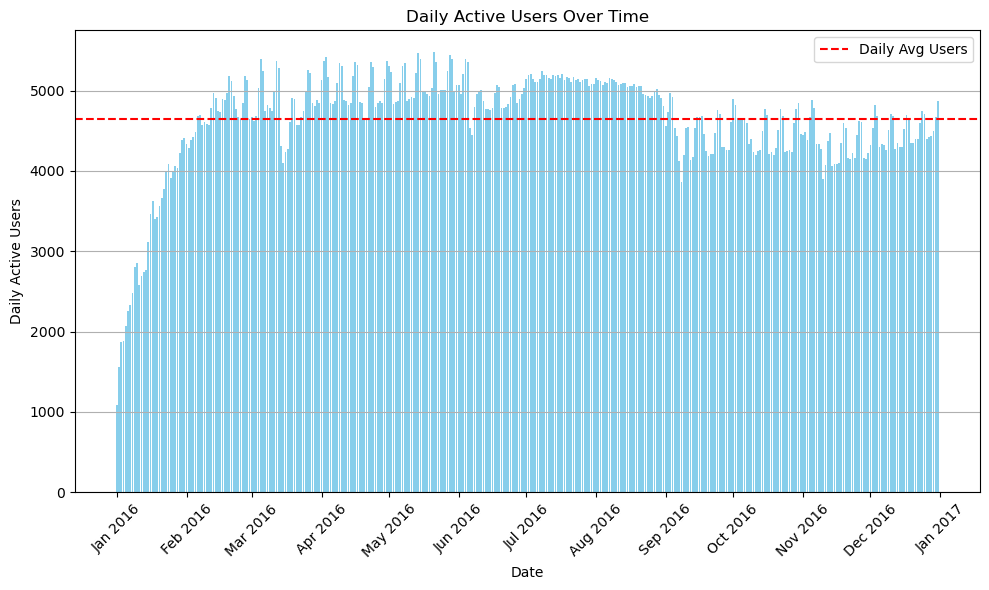

In [8]:
# Calculate daily average user count
daily_avg_users = df_account_date_session.groupby('date')['account_id'].nunique().mean()

# Group by date and count unique users to get daily active users (DAU)
dau_data = df_account_date_session.groupby('date')['account_id'].nunique().reset_index()
dau_data['date'] = pd.to_datetime(dau_data['date'])  
# Plotting DAU changes over time with bar plot
plt.figure(figsize=(10, 6))
plt.bar(dau_data['date'], dau_data['account_id'], width=0.8, color='skyblue')

plt.axhline(y=daily_avg_users, color='r', linestyle='--', label='Daily Avg Users')

plt.title('Daily Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')

# Set x-axis ticks to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

plt.legend()
plt.grid(axis='y') 
plt.tight_layout()
plt.show()


# DAU is higher or constantly higher in summer, this could be due to summer holidays in most  school/university. the games player might be mostly students
# DAU decrease from september due to school starting
# There is steady increase in DAU in Jan 2016, suggesting rise in popularity of game

# Sales Analyses

In [9]:

# Merging 'df_iap_purchase' and 'df_account' DataFrames on 'account_id'
merged_data = pd.merge(df_iap_purchase, df_account, on='account_id', how='inner')

# Analyzing geographic split of revenue and users
geo_split_revenue_users = merged_data.groupby('country_code').agg(
    total_revenue=('iap_price_usd_cents', 'sum'),
    unique_users=('account_id', 'nunique')
).reset_index()

# Calculate average revenue per user per market
geo_split_revenue_users['avg_revenue_per_user'] = geo_split_revenue_users['total_revenue'] / geo_split_revenue_users['unique_users']

# Displaying the geographic split of revenue, users, and average revenue per user per market
print(geo_split_revenue_users)


   country_code  total_revenue  unique_users  avg_revenue_per_user
0            AE           1953             2            976.500000
1            AR            920             2            460.000000
2            AT          28471             1          28471.000000
3            AU          45066            26           1733.307692
4            BE           1291             3            430.333333
5            BH           1475             1           1475.000000
6            BR           8598             6           1433.000000
7            CA         254506            42           6059.666667
8            CH         182774             9          20308.222222
9            CN        1136507           874           1300.351259
10           CO          45860             1          45860.000000
11           CY            368             1            368.000000
12           CZ           1289             2            644.500000
13           DE          94621            32           2956.90

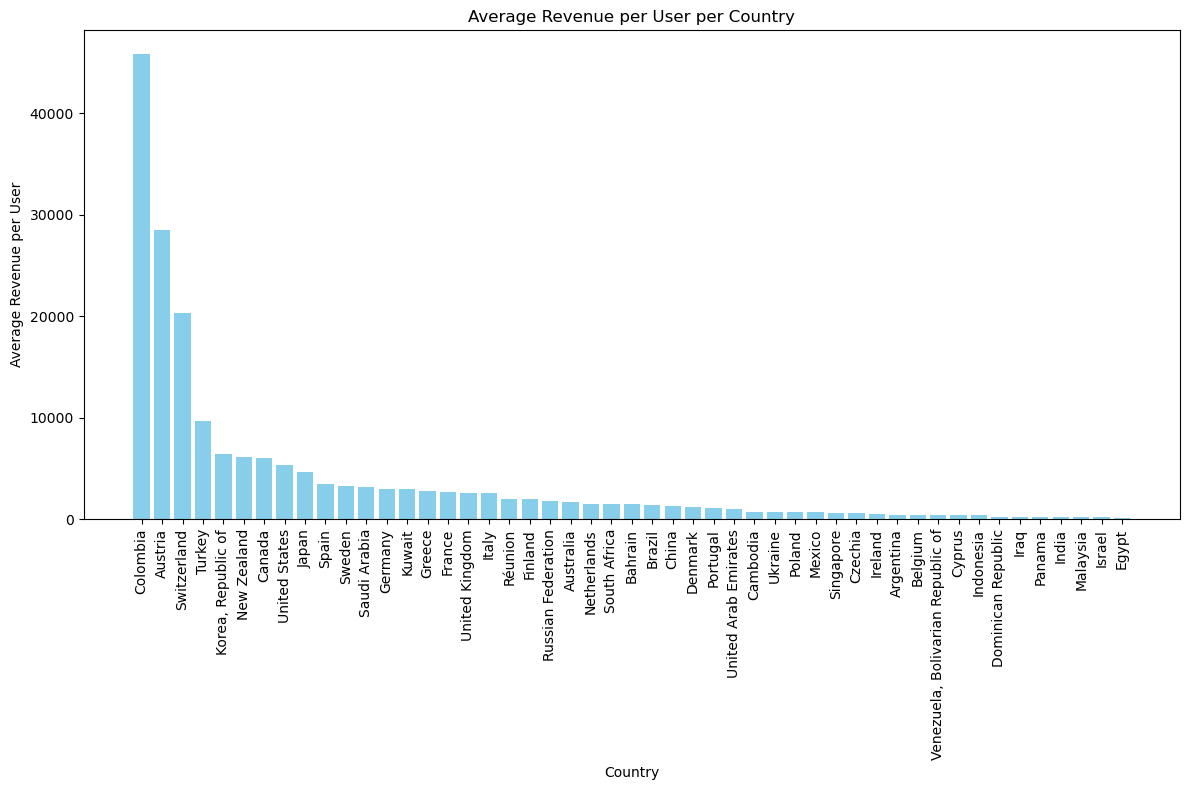

In [10]:
# Create a dictionary mapping country codes to full names
country_names = {country.alpha_2: country.name for country in pycountry.countries}

# Add a 'Country' column with full names to geo_split_revenue_users DataFrame
geo_split_revenue_users['Country'] = geo_split_revenue_users['country_code'].map(country_names)

# Sort data by avg_revenue_per_user in descending order
sorted_data = geo_split_revenue_users.sort_values('avg_revenue_per_user', ascending=False)

# Plotting the bar plot for average revenue per user per country with full names
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['avg_revenue_per_user'], color='skyblue')
plt.title('Average Revenue per User per Country')
plt.xlabel('Country')
plt.ylabel('Average Revenue per User')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


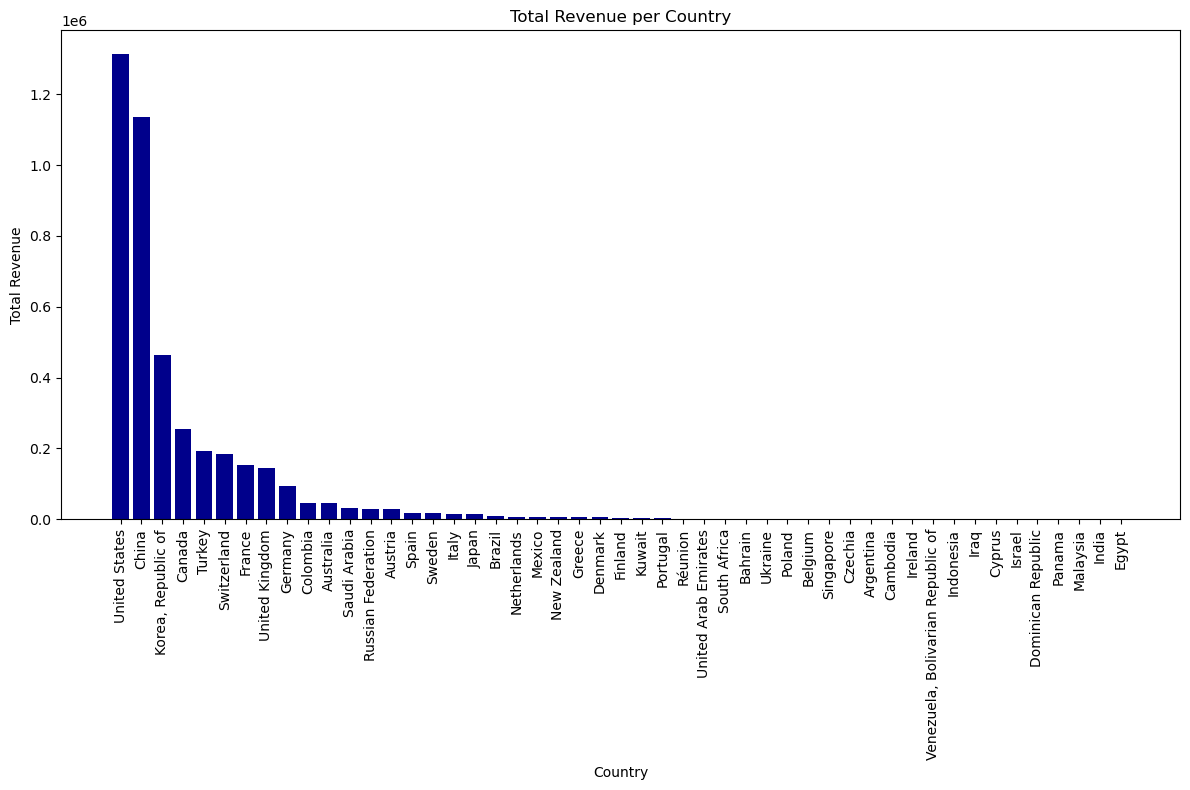

In [11]:
sorted_data = geo_split_revenue_users.sort_values('total_revenue', ascending=False)

# Plotting the bar plot for total revenue per country
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['total_revenue'], color='darkblue')
plt.title('Total Revenue per Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


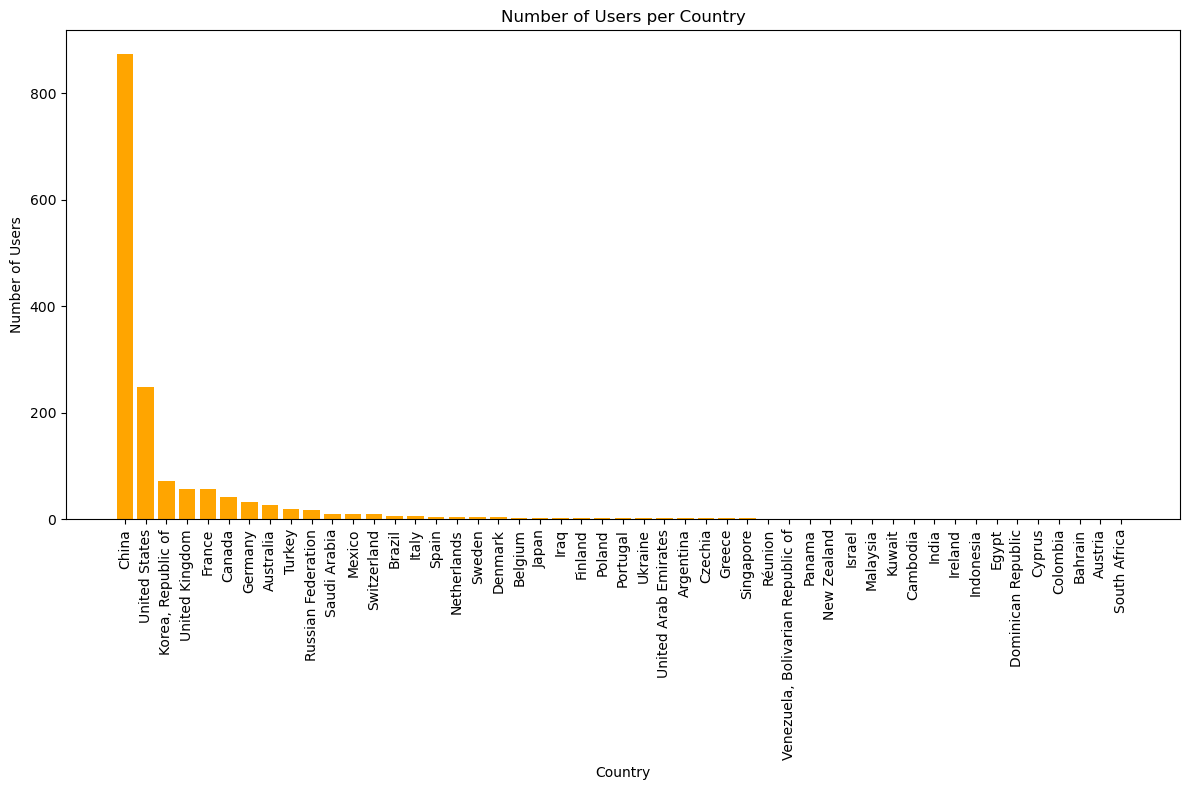

In [12]:
import matplotlib.pyplot as plt


# Sort data by unique_users in descending order
sorted_data = geo_split_revenue_users.sort_values('unique_users', ascending=False)

# Plotting the bar plot for number of users per country
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['Country'], sorted_data['unique_users'], color='orange')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# USA is the biggest revenue generator
# While China has the largest user base
# Colimbian spent most on average per user
